In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Load data
df = pd.read_csv('linkedin_data_analyst_jobs.csv')

# Clean data
df = df.dropna(subset=['Title', 'Company', 'Location'])

# Analyze job distribution by location
location_counts = df['Location'].value_counts().head(10)

# Analyze top hiring companies
company_counts = df['Company'].value_counts().head(20)

# Extract skills from job titles (example pattern matching)
def extract_skills(title):
    skills = []
    skill_patterns = {
        'SQL': r'SQL|sql',
        'Python': r'Python|python',
        'Excel': r'Excel|excel|spreadsheet',
        'Tableau': r'Tableau|tableau',
        'Power BI': r'Power\s*BI|power\s*bi',
        'R': r'\bR\b|r programming',
        'Machine Learning': r'Machine\s*Learning|ML',
        'Data Visualization': r'visualization|dashboard'
    }
    
    for skill, pattern in skill_patterns.items():
        if re.search(pattern, title):
            skills.append(skill)
    
    return skills

# Apply skill extraction
df['Skills'] = df['Title'].apply(extract_skills)


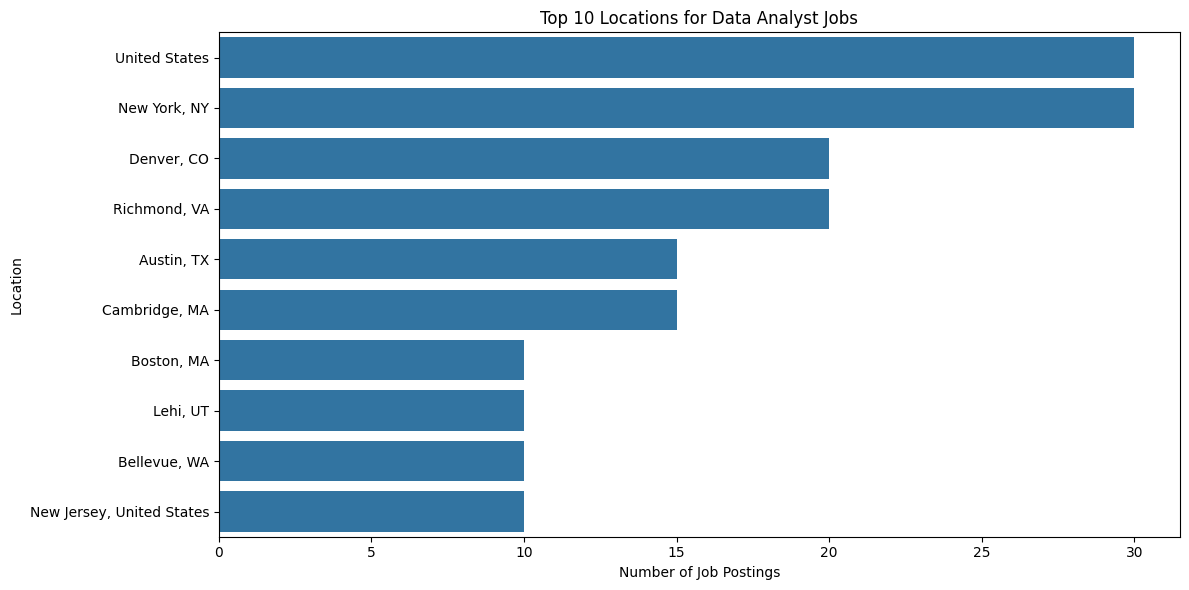

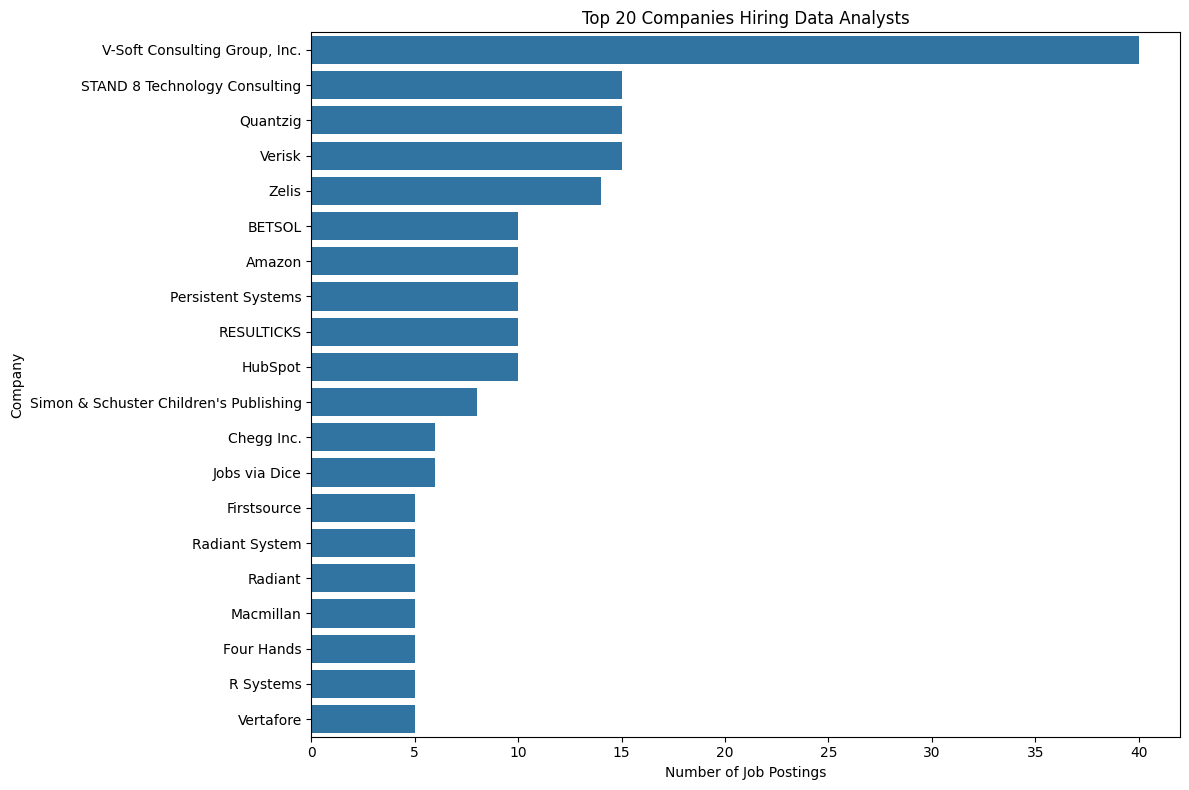

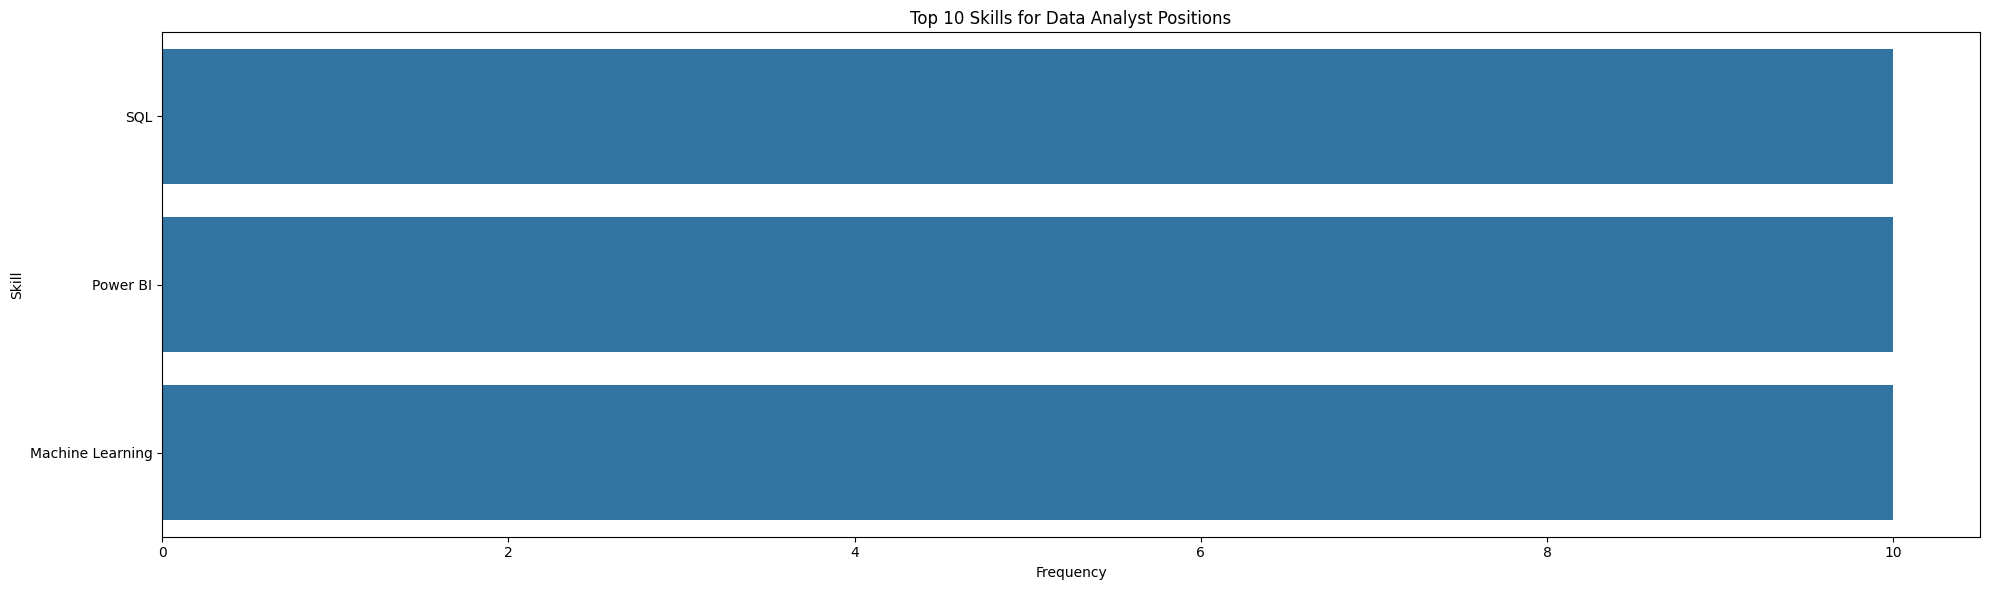

In [5]:
# Flatten skills list and count frequencies
all_skills = [skill for skills_list in df['Skills'] for skill in skills_list]
skill_counter = Counter(all_skills)
# Job distribution by location
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Top 10 Locations for Data Analyst Jobs')
plt.xlabel('Number of Job Postings')
plt.tight_layout()
plt.savefig('job_locations.png')

# Top hiring companies
plt.figure(figsize=(12, 8))
sns.barplot(x=company_counts.values, y=company_counts.index)
plt.title('Top 20 Companies Hiring Data Analysts')
plt.xlabel('Number of Job Postings')
plt.tight_layout()
plt.savefig('top_companies.png')

# Skills frequency
skills_df = pd.DataFrame(skill_counter.items(), columns=['Skill', 'Frequency'])
skills_df = skills_df.sort_values('Frequency', ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x='Frequency', y='Skill', data=skills_df.head(10))
plt.title('Top 10 Skills for Data Analyst Positions')
plt.tight_layout()
plt.savefig('top_skills.png')